In [7]:
import torch
import torch.nn.functional
import fastai.tabular.data # type: ignore
import fastai.tabular.learner # type: ignore
import fastai.callback.schedule # type: ignore
import structs.candle_traits

In [10]:
class Args:
    pass

args = Args()
args.trainset="data/JOINT.5m.trainset.100.csv"
args.output="data/JOINT.5m.minmax.100.model"
args.predict_field="c"
args.train_batch=100
args.train_cycles=30

traits = structs.candle_traits.CandleTraits.from_csv("c")
field_names = traits.make_batch_fields(args.train_batch)
loss_func=torch.nn.functional.mse_loss

In [3]:
loader = fastai.tabular.data.TabularDataLoaders.from_csv(args.trainset,
                                     path="",
                                     y_names=args.predict_field,
                                     cont_names=field_names,
                                     proc=[])

In [4]:
# Calculate_base_line:
base_line_train = loss_func(torch.tensor(loader.train.items["c0"].values),
                            torch.tensor(loader.train.items["c"].values))
print(base_line_train)
base_line_valid = loss_func(torch.tensor(loader.valid.items["c0"].values),
                            torch.tensor(loader.valid.items["c"].values))
print(base_line_valid)

tensor(0.0071)
tensor(0.0069)


In [5]:
learner = fastai.tabular.learner.tabular_learner(loader, n_out=1, loss_func=loss_func, layers=[200, 100])

/home/gz/.local/lib/python3.8/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.017782794311642647)

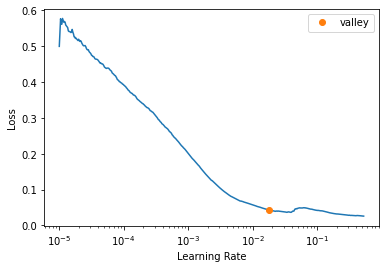

In [8]:
learner.lr_find(start_lr = 1e-05,end_lr = 1e+05, num_it = 1000)

In [9]:
learner.fit_one_cycle(args.train_cycles, 0.0001)

[0, 0.10994038730859756, 0.10500556230545044, '01:43']
[1, 0.01557190716266632, 0.011658798903226852, '01:48']
[2, 0.010991625487804413, 0.008564596064388752, '10:24']
[3, 0.009981299750506878, 0.007985987700521946, '01:51']
[4, 0.009607935324311256, 0.0075679197907447815, '01:34']
[5, 0.009105978533625603, 0.007474471814930439, '01:30']
[6, 0.009579685516655445, 0.007861722260713577, '01:27']
[7, 0.008950619027018547, 0.007318039424717426, '01:27']
[8, 0.010038543492555618, 0.008103382773697376, '01:39']
[9, 0.00857087317854166, 0.007178819738328457, '01:45']
[10, 0.00870295986533165, 0.007430457975715399, '01:42']
[11, 0.008807336911559105, 0.00710716750472784, '01:36']
[12, 0.008171802386641502, 0.007221776992082596, '01:45']
[13, 0.009113207459449768, 0.007235587574541569, '01:49']
[14, 0.009328345768153667, 0.00709118228405714, '01:47']
[15, 0.009208752773702145, 0.0071479822508990765, '01:50']
[16, 0.00868383888155222, 0.007235696539282799, '01:50']
[17, 0.008888600394129753, 0.0

In [11]:
learner.export(args.output)